# Multivariate analysis for TME cell comparison

Script related to figure s6a

Aim:
- Perform multiple linear regression for TME cell subset variable comparison

## Load packages

In [1]:
setwd("~/Documents/PhD/Software/Scripts/OVCT/1.REBUTTAL/0.Figures/6/0.Scripts/")

## Load sample labels

In [2]:
samples <- read.table('../1.Data/NACT_SampleLabels.txt',
                      sep='\t',
                      header=T,
                      row.names='Well')

In [3]:
matched <- c(3368,371,9717,8674,2359,564,7765,6965,9347)

samples$Matched <- samples$Case_mRNA %in% matched

In [4]:
head(samples)

,Name,Case_mRNA,NACT,Site,Bounds,Matched
A01,A01_3368A_Liver,3368,Untreated,other,in,TRUE
A02,A02_3368B_Liver,3368,Treated,other,out,TRUE
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,TRUE
A04,A04_0371B_R_diaphragm,371,Treated,other,out,TRUE
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,TRUE
A06,A06_9717B_R_ovary,9717,Treated,ovary,out,TRUE


## Load ConsensusTME NES

In [5]:
consensus_data <- read.table('../1.Data/ConsensusTME_NACT_NES.txt',
                             sep='\t',
                             header=T,
                             row.names='Term')

consensus_data <- t(consensus_data)
head(consensus_data)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
A01,0.2544767,0.16012391,0.23412023,0.14187053,-0.104189950,0.09241945,0.2670112,0.1720899,0.1814478,0.02192616,0.2304878,-0.02041523,0.1091831,0.3268816,-0.1512603,-0.12458821,-0.12105553,-0.17131674
A02,0.1831832,0.08682826,0.24272549,-0.03106225,-0.001941604,0.09346663,0.2836625,0.1048446,0.1960520,-0.11581174,0.2591486,-0.02526795,0.2488612,0.4832443,-0.1722784,-0.09932701,-0.11002029,-0.17662104
A03,0.3284338,0.25078253,0.35828990,0.35977859,0.118276210,0.30425047,0.4091265,0.2950658,0.3210669,0.04103930,0.3858617,0.02020867,0.3013136,0.4849676,0.1548997,0.09899607,0.02099488,0.12494436
A04,0.2229200,0.46928297,0.24966760,0.38595430,0.292185918,0.49939131,0.2848222,0.2185944,0.3128521,0.30652579,0.3205545,0.17078484,0.4332402,0.5125873,0.0690361,0.08209151,0.06589801,0.07791841
A05,0.1584463,0.14999672,0.09665491,-0.03893381,-0.136141994,0.03414850,0.2307931,0.1273806,0.2043502,-0.15383368,0.2006747,-0.09731896,0.2647767,0.2534280,-0.2120999,-0.16972010,-0.18042408,-0.28792353
A06,0.2086076,0.28042125,0.21956787,0.29585502,-0.127744151,0.03049037,0.3885820,0.2812594,0.3980291,-0.07557768,0.2615250,-0.01597149,0.2808125,0.3320963,-0.1439186,-0.14446257,-0.12065637,-0.19520560


### Split matched and unmatched samples data

In [6]:
matched   <- consensus_data[which(samples$Matched == TRUE ),]

unmatched <- consensus_data[which(samples$Matched == FALSE),]

In [7]:
dim(matched)

[1] 18 18

In [8]:
dim(unmatched)

[1] 38 18

In [9]:
38/2

[1] 19

In [10]:
tail(matched)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
B02,0.2402263,0.04165139,0.1960428,0.13219214,-0.03672601,0.26149548,0.3296904,0.2648137,0.2625680,0.11898768,0.2465675,-0.114436017,0.2835240,0.3383852,-0.16099866,-0.10924458,-0.10747554,-0.29836380
B03,0.2835227,0.33674780,0.4122715,0.22910920,0.22940228,0.28277541,0.4041324,0.3839678,0.4119708,0.05383048,0.2921816,0.127573340,0.3570923,0.6466582,0.03783387,0.14070057,0.11995260,0.15591034
B04,0.2839035,0.29739252,0.4115423,0.32445657,0.23703105,0.16866140,0.4024553,0.3650535,0.4139615,0.11777950,0.3647248,0.091471933,0.3717044,0.5847199,0.09239342,0.12828607,0.07697151,0.18938231
B05,0.2040914,0.10670975,0.2725495,0.17986191,0.42209691,0.23263157,0.3496187,0.2867881,0.2484168,0.02069893,0.3050340,0.004476703,0.4952381,0.5587154,0.11541886,0.05464495,-0.01055403,0.20189863
B06,0.1358404,-0.06047101,0.1364558,-0.01334995,-0.06623356,-0.03450019,0.3311684,0.2358284,0.1790985,-0.01447437,0.2186006,-0.174316371,0.1910897,0.1703691,-0.20636331,-0.20507770,-0.20014783,-0.35279681
B07,0.2521700,0.18689107,0.2492469,0.20180648,0.02932837,0.16933787,0.3171786,0.1382779,0.2975472,-0.06294442,0.2755501,0.040335033,0.2423303,0.5589227,-0.07622513,-0.01944428,-0.08464659,-0.07293489


### Remove columns not needed

In [11]:
matched    <- subset(
    cbind(matched, samples[which(samples$Matched == TRUE),]),
          select=-c(Name,Case_mRNA,Site,Bounds,Matched)
)

unmatched  <- subset(
    cbind(unmatched, samples[which(samples$Matched == FALSE),]),
    select=-c(Name,Case_mRNA,Site,Bounds,Matched)
)

In [12]:
head(matched)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,NACT
A01,0.2544767,0.16012391,0.23412023,0.14187053,-0.104189950,0.09241945,0.2670112,0.1720899,0.1814478,0.02192616,0.2304878,-0.02041523,0.1091831,0.3268816,-0.1512603,-0.12458821,-0.12105553,-0.17131674,Untreated
A02,0.1831832,0.08682826,0.24272549,-0.03106225,-0.001941604,0.09346663,0.2836625,0.1048446,0.1960520,-0.11581174,0.2591486,-0.02526795,0.2488612,0.4832443,-0.1722784,-0.09932701,-0.11002029,-0.17662104,Treated
A03,0.3284338,0.25078253,0.35828990,0.35977859,0.118276210,0.30425047,0.4091265,0.2950658,0.3210669,0.04103930,0.3858617,0.02020867,0.3013136,0.4849676,0.1548997,0.09899607,0.02099488,0.12494436,Untreated
A04,0.2229200,0.46928297,0.24966760,0.38595430,0.292185918,0.49939131,0.2848222,0.2185944,0.3128521,0.30652579,0.3205545,0.17078484,0.4332402,0.5125873,0.0690361,0.08209151,0.06589801,0.07791841,Treated
A05,0.1584463,0.14999672,0.09665491,-0.03893381,-0.136141994,0.03414850,0.2307931,0.1273806,0.2043502,-0.15383368,0.2006747,-0.09731896,0.2647767,0.2534280,-0.2120999,-0.16972010,-0.18042408,-0.28792353,Untreated
A06,0.2086076,0.28042125,0.21956787,0.29585502,-0.127744151,0.03049037,0.3885820,0.2812594,0.3980291,-0.07557768,0.2615250,-0.01597149,0.2808125,0.3320963,-0.1439186,-0.14446257,-0.12065637,-0.19520560,Treated


In [13]:
str(matched)

'data.frame':	18 obs. of  19 variables:
 $ B_cells            : num  0.254 0.183 0.328 0.223 0.158 ...
 $ Cytotoxic_cells    : num  0.1601 0.0868 0.2508 0.4693 0.15 ...
 $ Dendritic_cells    : num  0.2341 0.2427 0.3583 0.2497 0.0967 ...
 $ Endothelial        : num  0.1419 -0.0311 0.3598 0.386 -0.0389 ...
 $ Eosinophils        : num  -0.10419 -0.00194 0.11828 0.29219 -0.13614 ...
 $ Fibroblasts        : num  0.0924 0.0935 0.3043 0.4994 0.0341 ...
 $ Macrophages        : num  0.267 0.284 0.409 0.285 0.231 ...
 $ Macrophages_M1     : num  0.172 0.105 0.295 0.219 0.127 ...
 $ Macrophages_M2     : num  0.181 0.196 0.321 0.313 0.204 ...
 $ Mast_cells         : num  0.0219 -0.1158 0.041 0.3065 -0.1538 ...
 $ Monocytes          : num  0.23 0.259 0.386 0.321 0.201 ...
 $ NK_cells           : num  -0.0204 -0.0253 0.0202 0.1708 -0.0973 ...
 $ Neutrophils        : num  0.109 0.249 0.301 0.433 0.265 ...
 $ Plasma_cells       : num  0.327 0.483 0.485 0.513 0.253 ...
 $ T_cells_CD4        : num  -0.1

## Performed matched analysis

### Stroma

In [14]:
stroma_matched_fit = lm(
    Endothelial+Fibroblasts~NACT, data = matched)

In [15]:
summary(stroma_matched_fit)


Call:
lm(formula = Endothelial + Fibroblasts ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43621 -0.16107 -0.02201  0.17561  0.38673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.49862    0.08485   5.876 2.34e-05 ***
NACTUntreated -0.18880    0.12000  -1.573    0.135    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2545 on 16 degrees of freedom
Multiple R-squared:  0.134,	Adjusted R-squared:  0.07986 
F-statistic: 2.476 on 1 and 16 DF,  p-value: 0.1352


### Innate

In [91]:
innate_matched_fit = lm(
    Dendritic_cells+Eosinophils+Macrophages+Macrophages_M1+Macrophages_M2+Mast_cells+Monocytes+Neutrophils+NK_cells~NACT,
    data = matched
)

In [92]:
summary(innate_matched_fit)


Call:
lm(formula = Dendritic_cells + Eosinophils + Macrophages + Macrophages_M1 + 
    Macrophages_M2 + Mast_cells + Monocytes + Neutrophils + NK_cells ~ 
    NACT, data = matched)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8658 -0.5103 -0.1213  0.4850  1.3331 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.0581     0.2143   9.603 4.81e-08 ***
NACTUntreated  -0.6155     0.3031  -2.031   0.0593 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.643 on 16 degrees of freedom
Multiple R-squared:  0.2049,	Adjusted R-squared:  0.1552 
F-statistic: 4.123 on 1 and 16 DF,  p-value: 0.05926


In [ ]:
shapiro.test(innate_matched_fit$res)

### Adaptive

In [93]:
adaptive_matched_fit = lm(
    B_cells+Plasma_cells+T_cells_CD4+T_cells_CD8+T_cells_gamma_delta+T_regulatory_cells~NACT,
    data = matched
)

In [94]:
summary(adaptive_matched_fit)


Call:
lm(formula = B_cells + Plasma_cells + T_cells_CD4 + T_cells_CD8 + 
    T_cells_gamma_delta + T_regulatory_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73667 -0.50628 -0.06466  0.34615  1.27717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.6218     0.2074   2.998  0.00851 **
NACTUntreated  -0.5433     0.2933  -1.852  0.08250 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6222 on 16 degrees of freedom
Multiple R-squared:  0.1766,	Adjusted R-squared:  0.1251 
F-statistic: 3.432 on 1 and 16 DF,  p-value: 0.0825


In [ ]:
shapiro.test(adaptive_matched_fit$res)

### Cytotoxic cells

In [12]:
nk_cytotoxic_matched_fit = lm(
    NK_cells + Cytotoxic_cells ~ NACT,
    data = matched
)

In [13]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [95]:
cd8_cytotoxic_matched_fit = lm(
    T_cells_CD8 + Cytotoxic_cells ~ NACT,
    data = matched
)

In [96]:
summary(cd8_cytotoxic_matched_fit)


Call:
lm(formula = T_cells_CD8 + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36561 -0.11931 -0.04218  0.14316  0.40437 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.20468    0.07646   2.677   0.0165 *
NACTUntreated -0.18338    0.10813  -1.696   0.1093  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2294 on 16 degrees of freedom
Multiple R-squared:  0.1524,	Adjusted R-squared:  0.09938 
F-statistic: 2.876 on 1 and 16 DF,  p-value: 0.1093


## Performed unmatched analysis

In [ ]:
head(unmatched)

In [ ]:
str(unmatched)

### Stroma

In [97]:
stroma_unmatched_fit = lm(
    Endothelial+Fibroblasts~NACT,
    data = unmatched
)

In [98]:
summary(stroma_unmatched_fit)


Call:
lm(formula = Endothelial + Fibroblasts ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32276 -0.13467  0.00037  0.13271  0.54451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.50000    0.04792  10.434 1.97e-12 ***
NACTUntreated -0.03344    0.06777  -0.493    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2089 on 36 degrees of freedom
Multiple R-squared:  0.006717,	Adjusted R-squared:  -0.02087 
F-statistic: 0.2434 on 1 and 36 DF,  p-value: 0.6247


### Innate

In [99]:
innate_unmatched_fit = lm(
    Dendritic_cells+Eosinophils+Macrophages+Macrophages_M1+Macrophages_M2+Mast_cells+Monocytes+Neutrophils+NK_cells~NACT,
    data = unmatched
)

In [100]:
summary(innate_unmatched_fit)


Call:
lm(formula = Dendritic_cells + Eosinophils + Macrophages + Macrophages_M1 + 
    Macrophages_M2 + Mast_cells + Monocytes + Neutrophils + NK_cells ~ 
    NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43880 -0.45544 -0.06431  0.45560  1.94775 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.7878     0.1890   9.458  2.7e-11 ***
NACTUntreated   0.1365     0.2673   0.511    0.613    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.824 on 36 degrees of freedom
Multiple R-squared:  0.007188,	Adjusted R-squared:  -0.02039 
F-statistic: 0.2606 on 1 and 36 DF,  p-value: 0.6128


### Adaptive

In [101]:
adaptive_unmatched_fit = lm(
    B_cells+Plasma_cells+T_cells_CD4+T_cells_CD8+T_cells_gamma_delta+T_regulatory_cells~NACT,
    data = unmatched
)

In [102]:
summary(adaptive_unmatched_fit)


Call:
lm(formula = B_cells + Plasma_cells + T_cells_CD4 + T_cells_CD8 + 
    T_cells_gamma_delta + T_regulatory_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05756 -0.19507 -0.04827  0.24821  1.31449 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.38501    0.10735   3.586 0.000988 ***
NACTUntreated -0.02626    0.15181  -0.173 0.863665    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4679 on 36 degrees of freedom
Multiple R-squared:  0.0008301,	Adjusted R-squared:  -0.02692 
F-statistic: 0.02991 on 1 and 36 DF,  p-value: 0.8637


### Cytotoxic cells

In [103]:
nk_cytotoxic_unmatched_fit = lm(
    NK_cells + Cytotoxic_cells ~ NACT,
    data = unmatched
)

In [104]:
summary(nk_cytotoxic_unmatched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40568 -0.11764 -0.00656  0.11725  0.48066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.076446   0.041933   1.823   0.0766 .
NACTUntreated 0.007952   0.059303   0.134   0.8941  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1828 on 36 degrees of freedom
Multiple R-squared:  0.0004992,	Adjusted R-squared:  -0.02726 
F-statistic: 0.01798 on 1 and 36 DF,  p-value: 0.8941


In [105]:
cd8_cytotoxic_unmatched_fit = lm(
    T_cells_CD8 + Cytotoxic_cells ~ NACT,
    data = unmatched
)

In [106]:
summary(cd8_cytotoxic_unmatched_fit)


Call:
lm(formula = T_cells_CD8 + Cytotoxic_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37292 -0.10133 -0.03833  0.14373  0.53131 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    0.06392    0.04137   1.545    0.131
NACTUntreated  0.01300    0.05850   0.222    0.825

Residual standard error: 0.1803 on 36 degrees of freedom
Multiple R-squared:  0.001369,	Adjusted R-squared:  -0.02637 
F-statistic: 0.04937 on 1 and 36 DF,  p-value: 0.8254


# End script

In [26]:
devtools::install_github("cardiomoon/ggiraphExtra")


✔  checking for file ‘/private/var/folders/0x/_9tqxlf13mq9dnj3mvt0kr94vsllz0/T/RtmpjesUyT/remotese3152b192771/cardiomoon-ggiraphExtra-6a47d4b/DESCRIPTION’ ...
─  preparing ‘ggiraphExtra’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggiraphExtra_0.2.9.1.tar.gz’
   


In [ ]:
install.packages("rlang")

In [ ]:
install.packages(
   "ggplot2",
   repos = c("http://rstudio.org/_packages",
   "http://cran.rstudio.com")
)

In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

In [28]:
library(ggPredict)

ERROR: Error in library(ggPredict): there is no package called ‘ggPredict’


In [14]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [37]:
equation1=function(x){coef(nk_cytotoxic_matched_fit)[2]*x+coef(nk_cytotoxic_matched_fit)[1]}
equation2=function(x){coef(nk_cytotoxic_matched_fit)[2]*x+coef(nk_cytotoxic_matched_fit)[1]+coef(nk_cytotoxic_matched_fit)[3]}


Warning message:
“Removed 202 rows containing missing values (geom_path).”

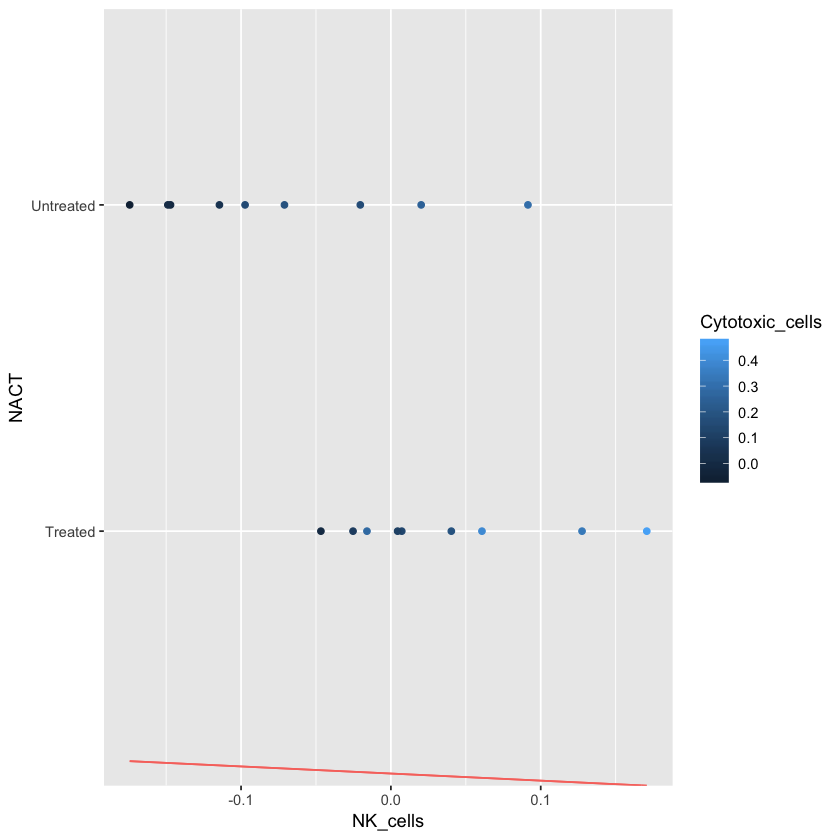

In [38]:
ggplot(matched,aes(y=NACT,x=NK_cells,color=Cytotoxic_cells))+geom_point()+
       stat_function(fun=equation1,geom="line",color=scales::hue_pal()(2)[1])+
       stat_function(fun=equation2,geom="line",color=scales::hue_pal()(2)[2])

In [72]:
nk_cytotoxic_matched_fit_glm <- glm(formula = NACT ~ NK_cells + Cytotoxic_cells,
                                    family = binomial, data = matched)

In [73]:
nk_cytotoxic_unmatched_fit_glm <- glm(formula = NACT ~ NK_cells + Cytotoxic_cells,
                                    family = binomial, data = unmatched)

In [58]:
summary(nk_cytotoxic_matched_fit_glm)


Call:
glm(formula = NACT ~ NK_cells + Cytotoxic_cells, family = binomial, 
    data = matched)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64410  -0.74293   0.02327   0.51782   2.13516  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.204      1.665  -1.324   0.1856  
NK_cells         -31.552     14.867  -2.122   0.0338 *
Cytotoxic_cells    9.815      8.072   1.216   0.2240  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.953  on 17  degrees of freedom
Residual deviance: 16.104  on 15  degrees of freedom
AIC: 22.104

Number of Fisher Scoring iterations: 5


In [31]:
library(ggiraph)
library(ggiraphExtra)
library(plyr)

Warning message:
“package ‘ggiraph’ was built under R version 3.5.2”

In [35]:
summary(matched$NACT)

Treated Untreated 
        9         9

In [123]:
cd8_cytotoxic_unmatched_fit_glm <- glm(formula = NACT ~ T_cells_CD8 + Cytotoxic_cells,
                                    family = binomial, data = unmatched)

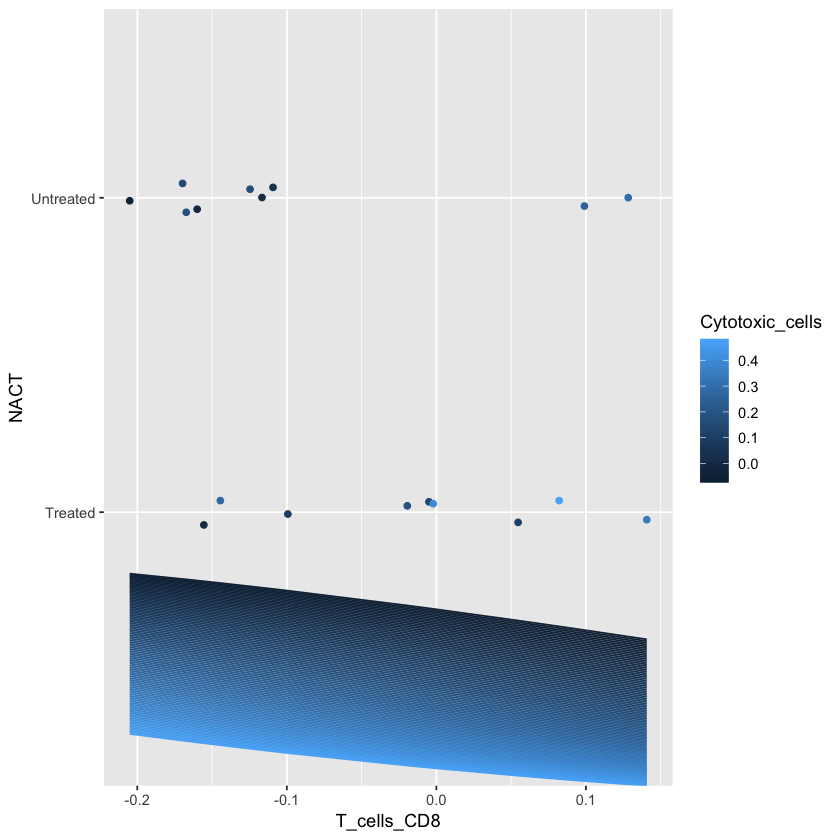

In [129]:
ggPredict(cd8_cytotoxic_matched_fit_glm,se=FALSE,interactive=FALSE,digits=100,
          colorn=100,jitter=TRUE)


In [127]:
dev.copy(pdf,'../2.Plots/nk_cytotoxic_unmatched.pdf')

ggPredict(nk_cytotoxic_unmatched_fit_glm,se=FALSE,interactive=FALSE,digits=100,
          colorn=100,jitter=TRUE)

dev.off()

pdf 
  3

pdf 
  2

In [117]:
?ggPredict

In [42]:
cd8_cytotoxic_matched_fit_glm <- glm(formula = NACT ~ T_cells_CD8 + Cytotoxic_cells,
                                    family = binomial, data = matched)

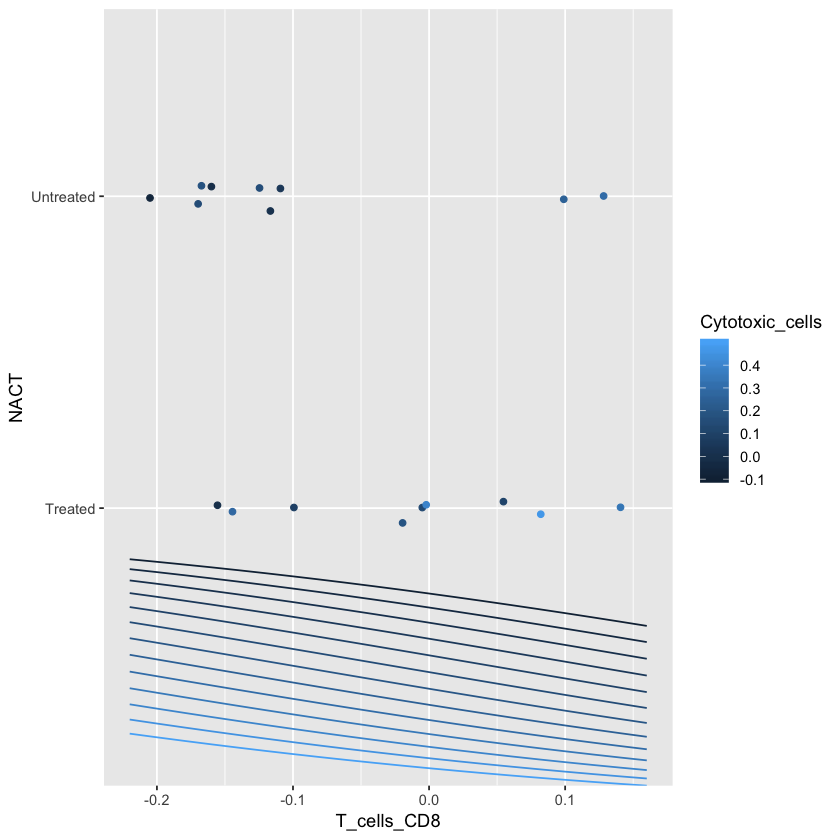

In [88]:
ggPredict(cd8_cytotoxic_matched_fit_glm,se=FALSE,interactive=FALSE,digits=3,
         colorn=10,jitter=TRUE)

In [48]:
endo_fibro_matched_fit_glm <- glm(formula = NACT ~ Endothelial+Fibroblasts,
                                    family = binomial, data = matched)

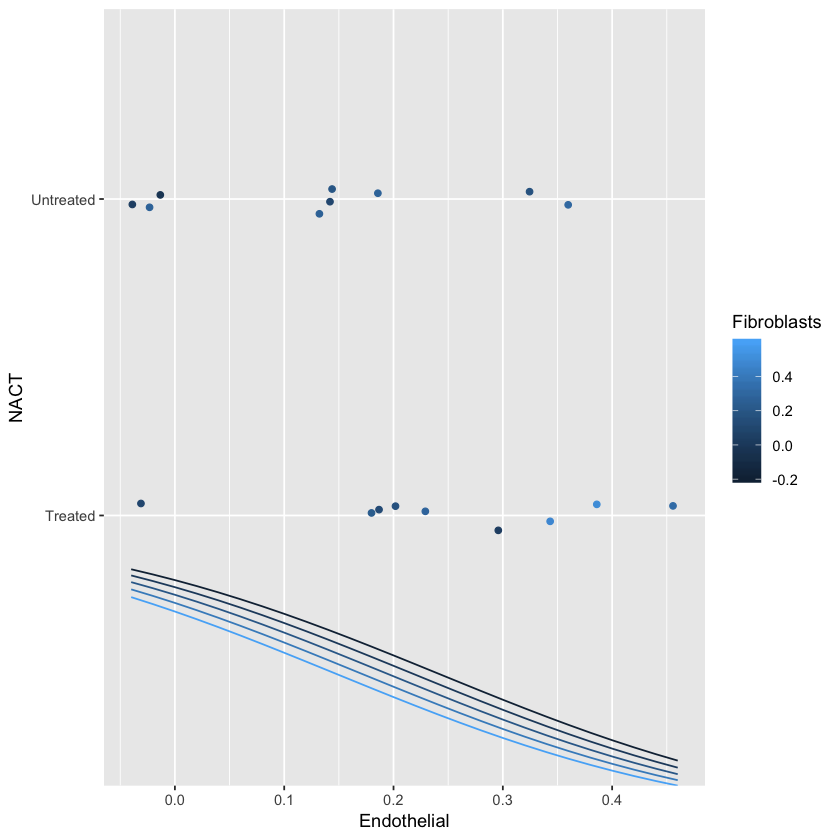

In [49]:
ggPredict(endo_fibro_matched_fit_glm,se=FALSE,interactive=FALSE,digits=3)

In [68]:
ggPredict(cd8_cytotoxic_matched_fit, interactive = FALSE)

ERROR: Error in ggPredict(cd8_cytotoxic_matched_fit, interactive = FALSE): object 'cd8_cytotoxic_matched_fit' not found


In [63]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [65]:
is.factor(matched$NK_cells)

[1] FALSE

In [ ]:
nk_cytotoxic_matched_fit

In [80]:
nk_matched_fit <- lm(formula = NK_cells ~ NACT, data = matched)

In [84]:
anova(nk_matched_fit,nk_cytotoxic_matched_fit)

Warning message in anova.lmlist(object, ...):
“models with response ‘"NK_cells + Cytotoxic_cells"’ removed because response differs from model 1”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
NACT,1,0.05390713,0.053907134,8.244065,0.01108248
Residuals,16,0.10462244,0.006538902,NA,NA


In [130]:
summary(nk_cytotoxic_matched_fit_glm)


Call:
glm(formula = NACT ~ NK_cells + Cytotoxic_cells, family = binomial, 
    data = matched)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64410  -0.74293   0.02327   0.51782   2.13516  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.204      1.665  -1.324   0.1856  
NK_cells         -31.552     14.867  -2.122   0.0338 *
Cytotoxic_cells    9.815      8.072   1.216   0.2240  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.953  on 17  degrees of freedom
Residual deviance: 16.104  on 15  degrees of freedom
AIC: 22.104

Number of Fisher Scoring iterations: 5


In [141]:
anova(nk_cytotoxic_matched_fit_glm,
      update(nk_cytotoxic_matched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
15,16.10359,NA,NA,NA
17,24.95330,-2,-8.849705,0.01197598


In [142]:
anova(cd8_cytotoxic_matched_fit_glm,
      update(cd8_cytotoxic_matched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
15,22.03441,NA,NA,NA
17,24.95330,-2,-2.918893,0.2323649


In [143]:
anova(nk_cytotoxic_unmatched_fit_glm,
      update(nk_cytotoxic_unmatched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
35,51.94732,NA,NA,NA
37,52.67919,-2,-0.731864,0.69355


In [144]:
anova(cd8_cytotoxic_unmatched_fit_glm,
      update(cd8_cytotoxic_unmatched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
35,51.68731,NA,NA,NA
37,52.67919,-2,-0.9918745,0.6089998


In [145]:
help(summary.lm)